## Example of multimeter recording to file
* https://nest-simulator.readthedocs.io/en/latest/auto_examples/multimeter_file.html

In [1]:
import matplotlib.pyplot as plt
import nest
import numpy

nest.ResetKernel()


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0-post0.dev0
 Built: Oct  2 2024 11:54:50

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



[admin:1956915] shmem: mmap: an error occurred while determining whether or not /tmp/ompi.admin.1000/jf.0/390791168/shared_mem_cuda_pool.admin could be created.
[admin:1956915] create_and_attach: unable to create shared memory BTL coordinating structure :: size 134217728 


In [2]:
nest.overwrite_files = True
nest.data_path = "data"
nest.data_prefix = ""

In [3]:
print(f"iaf_cond_alpha recordables: {nest.GetDefaults("iaf_cond_alpha")["recordables"]}")

iaf_cond_alpha recordables: ('g_ex', 'g_in', 't_ref_remaining', 'V_m')


In [4]:
neuron = nest.Create("iaf_cond_alpha", params={"tau_syn_ex": 1.0, "V_reset": -70.0})

multimeter = nest.Create(
    "multimeter",
    params={"interval": 0.1, "record_from": ["V_m", "g_ex", "g_in"], "record_to": "ascii", "label": "my_multimeter"},
)

s_ex = nest.Create("spike_generator", params={"spike_times": numpy.array([10.0, 20.0, 50.0])})
s_in = nest.Create("spike_generator", params={"spike_times": numpy.array([15.0, 25.0, 55.0])})

In [5]:
nest.Connect(s_ex, neuron, syn_spec={"weight": 40.0})
nest.Connect(s_in, neuron, syn_spec={"weight": -20.0})
nest.Connect(multimeter, neuron)

In [6]:
nest.Simulate(100.0) # ms


Oct 10 09:52:13 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Oct 10 09:52:13 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 100
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Oct 10 09:52:13 SimulationManager::run [Info]: 
    Simulation finished.


In [7]:
data = numpy.loadtxt(multimeter.filenames[0], skiprows=3)
sender, t, v_m, g_ex, g_in = data.T

In [8]:
multimeter.filenames

('data/my_multimeter-2-0.dat',)

In [9]:
data.T

array([[  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ],
       [  0.1  ,   0.2  ,   0.3  , ...,  98.8  ,  98.9  ,  99.   ],
       [-70.   , -70.   , -70.   , ..., -70.322, -70.32 , -70.317],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,   0.   ]])

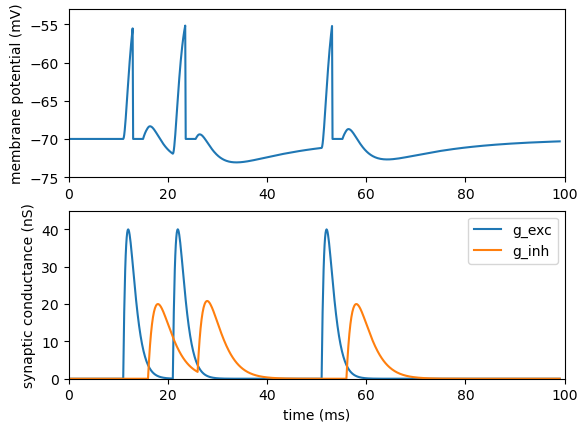

In [10]:
plt.clf()

plt.subplot(211)
plt.plot(t, v_m)
plt.axis([0, 100, -75, -53])
plt.ylabel("membrane potential (mV)")

plt.subplot(212)
plt.plot(t, g_ex, t, g_in)
plt.axis([0, 100, 0, 45])
plt.xlabel("time (ms)")
plt.ylabel("synaptic conductance (nS)")
plt.legend(("g_exc", "g_inh"))
plt.show()